In [ ]:
#191180008
#Tuğba AKIN

In [1]:
#Importing libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error                 
from sklearn.metrics import mean_squared_error                   
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
from sklearn import datasets
iris = sns.load_dataset('iris')


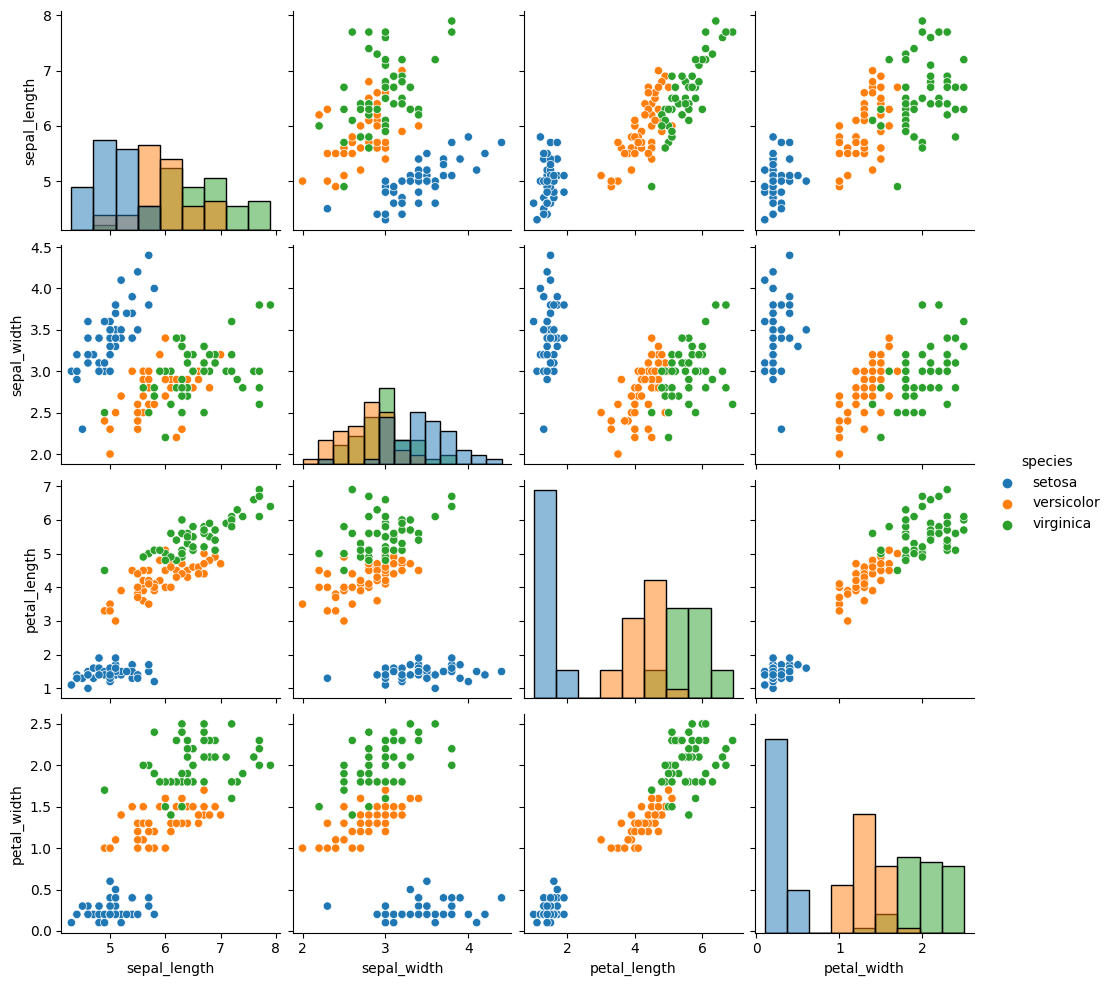

In [2]:
#Q1
# Create a scatter plot matrix
sns.pairplot(iris, hue='species' ,diag_kind='hist')


In [3]:
#Deleting sepal_width and sepal_length
del iris['sepal_width']
del iris['sepal_length']

iris



,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [4]:
#Q2
iris = iris.reindex(np.random.permutation(iris.index))

# creating training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(iris[['petal_width']], iris['petal_length'], test_size=0.3)

In [5]:
#Q3

lreg = LinearRegression()
lreg.fit(X_train.values.reshape(-1,1), y_train.values)

# Use the model to make predictions on the test set
y_pred = lreg.predict(X_test.values.reshape(-1,1))
y_pred

array([3.5216106 , 3.96681769, 5.0798354 , 5.52504249, 5.97024958,
       5.30243895, 1.9633858 , 1.51817871, 5.97024958, 4.85723186,
       3.96681769, 1.51817871, 1.9633858 , 5.97024958, 1.51817871,
       4.63462832, 5.0798354 , 4.18942123, 5.74764603, 1.9633858 ,
       1.51817871, 4.41202477, 4.18942123, 5.74764603, 3.29900706,
       3.74421414, 1.74078225, 1.51817871, 5.0798354 , 6.19285312,
       4.41202477, 3.96681769, 4.41202477, 5.52504249, 1.51817871,
       1.51817871, 6.19285312, 1.29557517, 4.41202477, 3.96681769,
       6.41545666, 4.18942123, 1.51817871, 4.18942123, 2.40859288])

In [14]:
#Q4
# use the linear regression to make predictions on the testing data

y_pred = lreg.predict(X_test.values.reshape(-1,1))

# compute the mae and mse

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print('Mean absolute error:', mae)
print('Mean squared error:', mse)


Mean absolute error: 0.41335598372702115
Mean squared error: 0.30026575200316047


In [7]:
# Q5

# Picking flower randomly
random_index = np.random.randint(0,45)
print("Random index:",random_index)
print(iris.loc[random_index])
# Show mse error and predicted value
print(f"Predicted petal_length: {y_pred[random_index]:.1f}")
print(f"Actual petal_length: {iris.loc[random_index]['petal_length']:.1f}")
print(f"Mean Squarred Error is: {np.mean(np.square(np.abs(iris.loc[random_index]['petal_length'] - y_pred[random_index]))):.2f}")




Random index: 9
petal_length       1.5
petal_width        0.1
species         setosa
Name: 9, dtype: object
Predicted petal_length: 4.9
Actual petal_length: 1.5
Mean Squarred Error is: 11.27


In [8]:
#Q6

deg1 = np.polyfit(iris['petal_width'], iris['petal_length'], 1)

# Output the equation
print(f"The Equation is :{deg1[0]:.3f}x + {deg1[1]:.3f}=0")

The Equation is :2.230x + 1.084=0


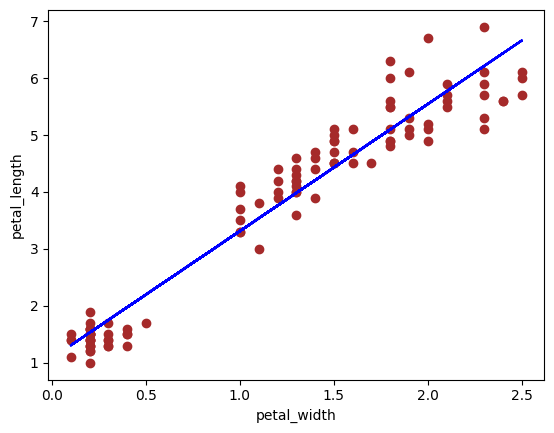

In [9]:
#Q7

# Plot the data points
plt.scatter(X_train, y_train, c='brown')

# Plot the fitted line
plt.plot(X_train, deg1[0] * X_train + deg1[1], color="blue")
plt.xlabel('petal_width' ,c='black')
plt.ylabel('petal_length' ,c='black')
plt.show()


In [10]:
#Q8

y_pred = lreg.predict(X_test.values.reshape(-1,1))


# Compute the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse) 

0.5479651010814105


In [11]:
#Q9

# Load the Iris dataset and extract the petal width and length
iris = load_iris()
X = iris.data[:, 2:]  # petal width and length
y = iris.target


# Fit a second-degree polynomial to the data
secdeg = np.polyfit(X[:, 0], y, deg=2)


print(f" The Equation is :{secdeg[0]:.3f}x^2 + {secdeg[1]:.3f}x + {secdeg[2]:.3f} = 0")



 The Equation is :0.011x^2 + 0.360x + -0.550 = 0


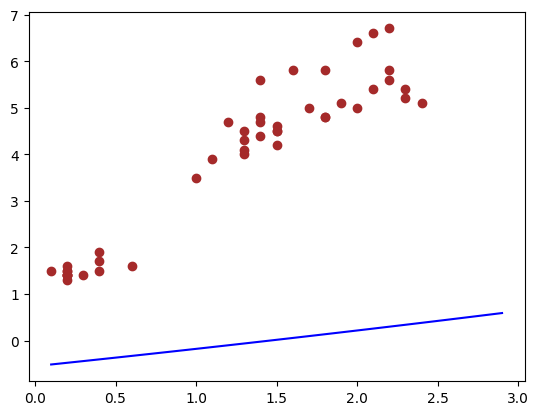

In [13]:
#Q10

# Ploting the second-degree polynomial on a scatter plot
plt.scatter(X_test, y_test, c='brown')

# Generating x values for the curve
x = np.linspace(X_test.min(), X_test.max()+0.5, 100)

# Calculating y values for the curve
y = secdeg[0] * x**2 + secdeg[1] * x + secdeg[2]

# Ploting the curve
plt.plot(x, y, color="blue")
plt.show()